In [27]:
import csv
import re
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager as fm, rc

In [179]:
def loadcsv(file, encoding='utf-8'):
	f = open(file, mode='r', encoding=encoding)
	f.seek(0)
	data = csv.reader(f)
	header = next(data)
	for row in data:
		row[1:] = [comma.replace(',', '') for comma in row[1:]]
	return data

### 산격3동 인구현황

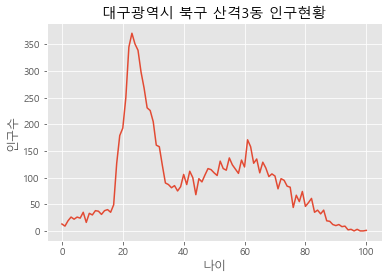

In [61]:
result = []
city = ''
for row in loadcsv('../../공공데이터수업과제/Data/age.csv', 'euc_kr'):
	if '산격3동' in row[0]:
		city = re.split('[()]', row[0])[0]
		for data in row[3:]:
			result.append(int(data))		
f.close()


if platform.system() == 'Windows':
	plt.rc('font', family='Malgun Gothic')
else:
	plt.rc('font', family='AppleGothic')

plt.title(f'{city} 인구현황')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot')
plt.plot(result)
plt.show()

### 지역 이름을 입력받아 해당 지역의 인구 분포 그리는 함수

In [66]:
def parse(district_city_name):
	'''행정구역명에서 코드 번호 제거 후 지역/도시 이름 파싱'''
	district_city_name = re.split('[()]', district_city_name)
	return district_city_name[0]


def get_population(district):
	population_list = []
	district_name = ''
	for row in loadcsv('../../공공데이터수업과제/Data/age.csv', 'euc_kr'):
		if district in row[0]:
			district_name = parse(row[0])
			for data in row[3:]:
				population_list.append(int(data))	
	f.close()		
	graph_population(district_name, population_list)


def print_population(popluation):
	'''특정 지역의 인구 현황 출력'''
	for i in range(len(popluation)):
		print(f'{i:3d}세: {popluation[i]:4d}명', end=' ')
		if (i + 1) % 10 == 0:
			print()
	print()
	

def graph_population(district_name, population_list):
	'''특정 지역 인구 분포 그래프(plot)
	district_name: 지역 이름
	population_list: 0~100세 이상까지의 인구 수 리스트
	'''
	if platform.system() == 'Windows':
		font_name = fm.FontProperties(fname=r'C:\Windows\Fonts\malgun.ttf').get_name()
		plt.rc('font', family=font_name)
	else:
		plt.rc('font', family='AppleGothic')

	plt.style.use('ggplot')
	plt.title(f'{district_name} 인구 현황')
	plt.xlabel('나이')
	plt.ylabel('인구 수')
	plt.bar(range(101), population_list)
	plt.xticks(range(0, 101, 10))
	plt.plot(population_list)
	plt.show()

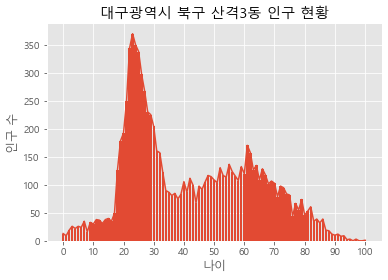

In [65]:
district = input('인구 현황을 파악하고 싶은 지역 이름(읍면동 단위)을 입력해주세요 ')
get_population(district)

### 대구광역시 투표 가능 인구 분석

In [112]:
def draw_piechart(city_name, city_popluation, voting_popluation):
	'''전체 인구 수 대비 투표 가능 인구 파이차트 작성'''
	non_voting_popluation = city_popluation - voting_popluation
	poplulation = [non_voting_popluation, voting_popluation]
	# color = ['tomato', 'royalblue']
	plt.title(city_name + '투표 가능 인구 비율')
	plt.pie(poplulation, labels=['18세 미만', '투표가능인구'],\
		autopct='%.1f%%', startangle=90)
	plt.legend()
	plt.show()

	
def voting_population(city):
	city_name = ''
	city_population = 0
	voting_population = 0
	for row in loadcsv('../../공공데이터수업과제/Data/age.csv', 'euc_kr'):
		if city in row[0]:
			city_name = parse(row[0])
			city_population += int(row[1])
			for data in row[21:]:
				voting_num = int(data)
				voting_population += voting_num
	f.close()
	print(f'{city_name} 전체 인구 {city_population:,}명 중 투표 가능 인구 {voting_population:,}')

In [113]:
voting_population('대구광역시')

 전체 인구 0명 중 투표 가능 인구 0


---
## Gender 데이터 분석

In [158]:
# 연령별 성별 데이터 시각화(1)
def draw_gender_population(male_stat, female_stat):
	if platform.system() == 'Windows':
		plt.rc('font', family='Malgun Gothic')
	else:
		plt.rc('font', family='AppleGothic')
	
	plt.barh(range(len(male_stat)), male_stat, label='남성')
	plt.barh(range(len(female_stat)), female_stat, label='여성')
	plt.rcParams['axes.unicode_minus']=False
	plt.legend()
	plt.show()


# 연령별 성별 데이터 시각화(2)
def calculate_population():
	male_stat = []
	female_stat = []
	district = input('지역(동) 입력 ')
	for row in loadcsv('../../공공데이터수업과제/Data/gender.csv'):
		for male in row[106:207]:
			male_stat.append(int(male))
		for female in row[209:310]:
			female_stat.append(int(female))
	f.close()
	print('전체 남성 인구', sum(male_stat))
	print_population(male_stat)
	print()
	print('전체 여성 인구', sum(female_stat))
	print_population(female_stat)
	draw_gender_population(male_stat, female_stat)

### 특정 지역의 연령, 성별 분포

전체 남성 인구 0

전체 여성 인구 0


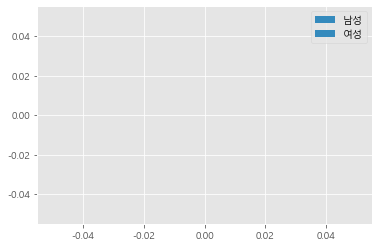

In [165]:
# loadcsv('../../공공데이터수업과제/Data/gender.csv')
# data header(column 부분) 확인
# for i in range(len(header)):
# 	print(f'[{i}]: {header[i]}', end=',')
# 	if (i + 1) % 5 == 0:
# 		print()
# f.seek(0)
# f.tell()
# f.close()

calculate_population()

### 특정 지역의 연령, 성별 분포 항아리 차트로 시각화

- 여성 데이터 오른쪽, 남성 데이터 왼쪽(음수로 변환)

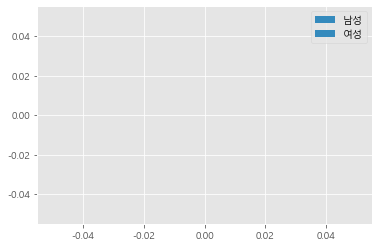

In [163]:
male_stat_list = []
female_stat_list = []
district = input('지역(동) 이름 입력 ')

for row in loadcsv('../../공공데이터수업과제/Data/gender.csv'):
	if district in row[0]:
		for male in row[106:207]:
			male_stat_list.append(-int(male))
		for female in row[209:310]:
			female_stat_list.append(int(female))

draw_gender_population(male_stat_list, female_stat_list)

### 제주 남녀 인구 비율

In [ ]:
# city = input('찾고 싶은 지역 이름 입력 ')
male_count = 0
female_count = 0
for row in loadcsv('../../공공데이터수업과제/Data/gender.csv'):
	if '제주도' in row[0]:
		male_count = int(row[104])
		female_count = int(row[207])
		break

print(f'{city} 남자 인구 {male_count:,}명, 여자 인구 {female_count:,}')

# pie chart
if platform.system() == 'Windows':
	plt.rc('font', family='Malgun Gothic')
else:
	plt.rc('font', family='AppleGothic')

population = [male_count, female_count]
plt.title(city, '지역 남녀 성비')
plt.pie(population, labels=['남', '여'], autopct='%.1%%', startangle=90)
plt.show()

### 제주 인구 연령 현황

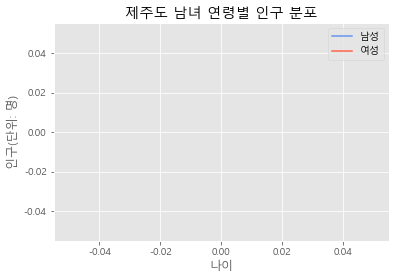

In [182]:
male_list = []
female_list = []
for row in loadcsv('../../공공데이터수업과제/Data/gender.csv'):
	if '제주' in row[0]:
		for i in range(106, 207):
			male_list.append(int(row[i]))
			female_list.append(int(row[i+103]))
		break

# line graph
if platform.system() == 'Windows':
	plt.rc('font', family='Malgun Gothic')
else:
	plt.rc('font', family='AppleGothic')


color = ['cornflowerblue', 'tomato']
plt.title('제주도 남녀 연령별 인구 분포')
plt.plot(male_list, label='남성', color=color[0])
plt.plot(female_list, label='여성', color=color[1])
plt.xlabel('나이')
plt.ylabel('인구(단위: 명)')
plt.legend()
plt.show()

In [ ]:
city_list = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시']

for city in city_list:
	male_list = []
	female_list = []
	for row in data:
		if city in row[0]:
			for i in range(106, 207):
				male_list.append(int(row[i]))
				female_list.append(int(row[i+103]))
			break



---
### 여러 그래프 한 번에 그리기
- x, y축 tick 공유: sharex=True, sharey=True

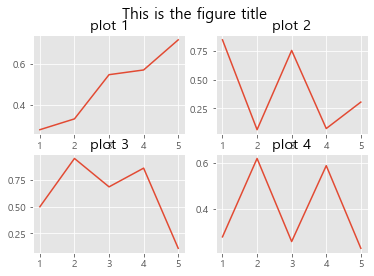

In [174]:
import numpy as np


x = np.arange(1, 6)
y1 = np.random.rand(5)
y2 = np.random.rand(5)
y3 = np.random.rand(5)
y4 = np.random.rand(5)


# plt.suptitle('This is the figure title', fontsize=15)
# plt.subplot(2, 2, 1)
# plt.title('plot 1')
# plt.plot(x, y1)

# plt.subplot(2, 2, 2)
# plt.title('plot 2')
# plt.plot(x, y2)

# plt.subplot(2, 2, 3)
# plt.title('plot 3')
# plt.plot(x, y3)

# plt.subplot(2, 2, 4)
# plt.title('plot 4')
# plt.plot(x, y4)
# plt.show()


fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle('This is the figure title', fontsize=15)

axes[0, 0].plot(x, y1)
axes[0, 0].set_title('plot 1')

axes[0, 1].plot(x, y2)
axes[0, 1].set_title('plot 2')

axes[1, 0].plot(x, y3)
axes[1, 0].set_title('plot 3')

axes[1, 1].plot(x, y4)
axes[1, 1].set_title('plot 4')
plt.show()